En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

In [112]:
import pandas as pd
import random 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

import researchpy as rp
import scipy.stats as stats
from scipy.stats import levene
from scipy.stats import kstest
from scipy.stats import skew


plt.rcParams["figure.figsize"] = (16,10) 

import warnings
warnings.filterwarnings('ignore')

In [113]:
df = pd.read_pickle("datos/cars_price1.pkl")
df.head(2)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
ID,,,,,,,,,,,,,,,,
45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04,Silver,12
44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04,Black,8


El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:


### <font color=violet>  Normalidad


- Test de normalidad visualmente

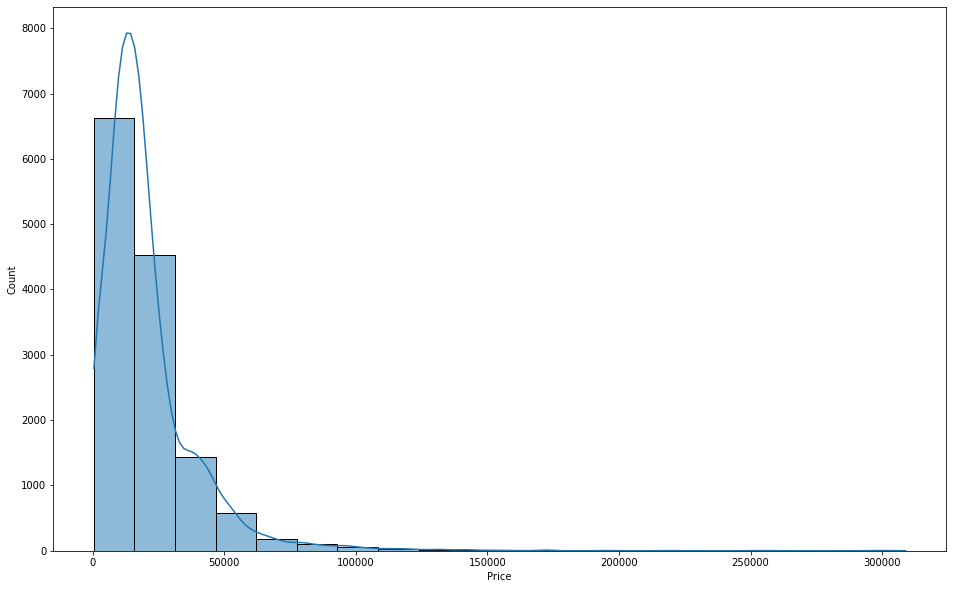

In [114]:
sns.histplot(df['Price'], kde = True, bins = 20);

Visualmente podemos observar que no tenemos una distribución normal en nuestra variable respuesta, que los datos están sesgados hacia la derecha y la gráfica no se parece a una campana de gauss.

- Test de Normalidad Analíticamente

In [115]:
kstest(df['Price'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

Analíticamente el kstest nos demuestra que nuestro *p-valor* < 0.05, podemos rechazar la H0 por lo que los datos no  son normales.

### <font color=violet> Homogeneidad de varianzas


Realizamos boxplot por cada una de nuestras variables categóricas:

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13584 entries, 45654403 to 45804997
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             13584 non-null  int64   
 1   Levy              13584 non-null  int64   
 2   Manufacturer      13584 non-null  object  
 3   Model             13584 non-null  object  
 4   Prod. year        13584 non-null  int64   
 5   Category          13584 non-null  object  
 6   Leather interior  13584 non-null  object  
 7   Fuel type         13584 non-null  object  
 8   Engine volume     13584 non-null  object  
 9   Mileage           13584 non-null  int64   
 10  Cylinders         13584 non-null  float64 
 11  Gear box type     13584 non-null  object  
 12  Drive wheels      13584 non-null  object  
 13  Doors             13584 non-null  category
 14  Color             13584 non-null  object  
 15  Airbags           13584 non-null  int64   
dtypes: category(

Manufacturer:

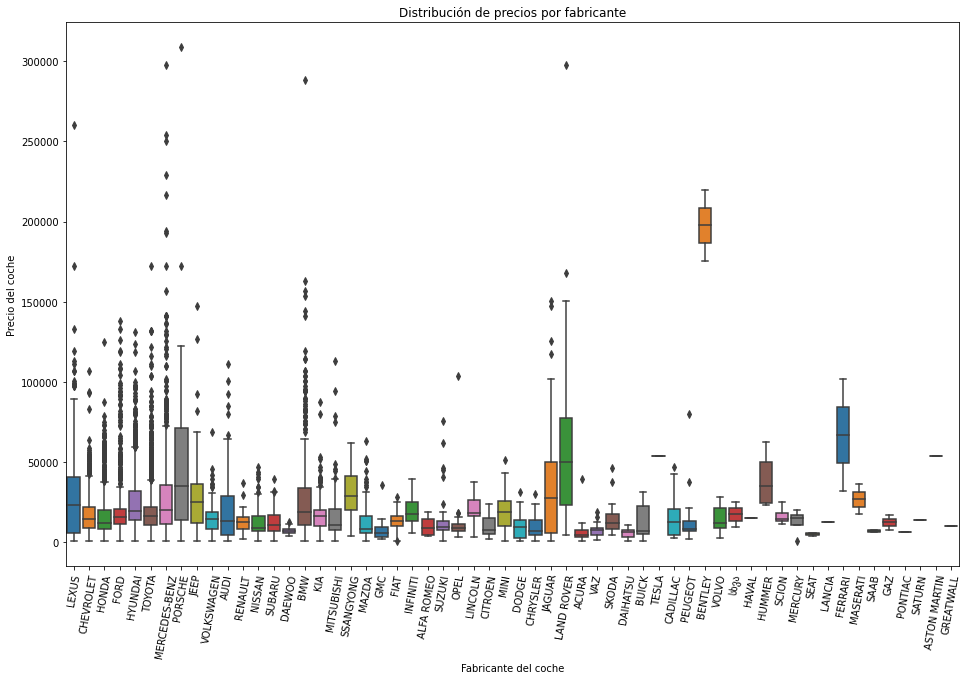

In [117]:
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.boxplot(
    x       = 'Manufacturer',
    y       = 'Price',
    data    = df,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución de precios por fabricante')
ax.set_ylabel('Precio del coche')
ax.set_xlabel('Fabricante del coche')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 80);

In [118]:
df["Manufacturer"].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'PORSCHE', 'JEEP', 'VOLKSWAGEN', 'AUDI',
       'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'BMW', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'OPEL', 'LINCOLN', 'CITROEN', 'MINI',
       'DODGE', 'CHRYSLER', 'JAGUAR', 'LAND ROVER', 'ACURA', 'VAZ',
       'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC', 'PEUGEOT',
       'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION', 'MERCURY',
       'SEAT', 'LANCIA', 'FERRARI', 'MASERATI', 'SAAB', 'GAZ', 'PONTIAC',
       'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [119]:
lexus = df[df["Manufacturer"] == 'LEXUS']["Price"]
chevrolet = df[df["Manufacturer"] == 'CHEVROLET']["Price"]
honda = df[df["Manufacturer"] == 'HONDA']["Price"]
ford = df[df["Manufacturer"] == 'FORD']["Price"]

In [120]:
# Levene test
# ==============================================================================
levene_test = stats.levene(lexus, chevrolet, honda, ford, center='median')
levene_test

LeveneResult(statistic=66.62275509936191, pvalue=1.2647099857274739e-41)

Modelo

In [121]:
#nos lo cargamos?? 
# en este caso no se puede agrupar

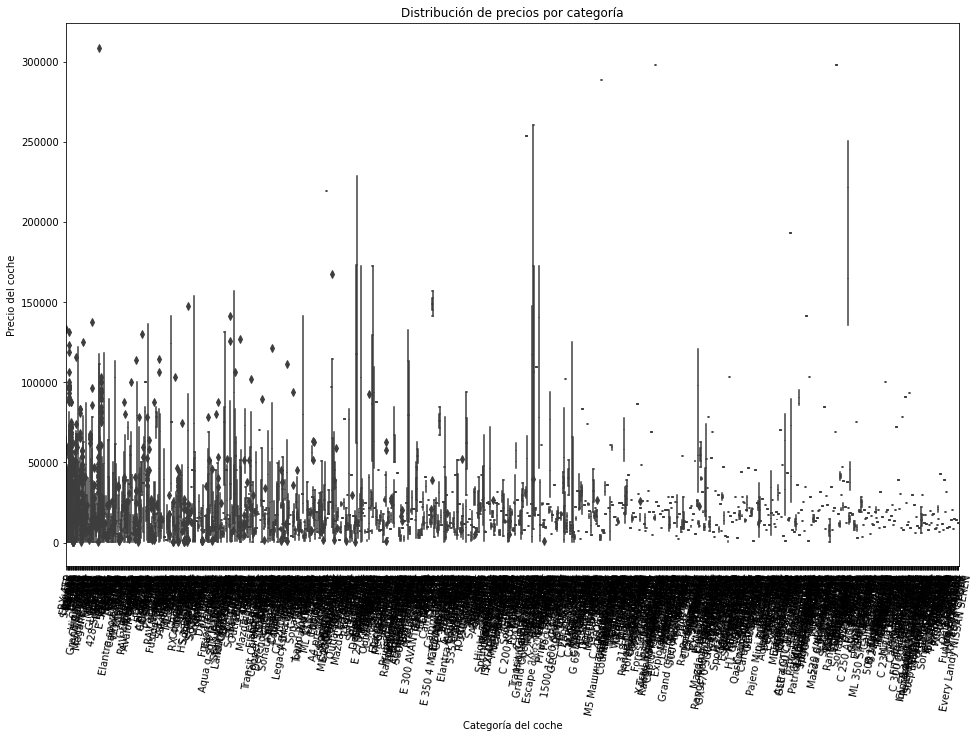

In [122]:
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.boxplot(
    x       = 'Model',
    y       = 'Price',
    data    = df,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución de precios por categoría')
ax.set_ylabel('Precio del coche')
ax.set_xlabel('Categoría del coche')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 80);

Cómo podemos ver, esta gráfica no nos da la infromación que necesitamos, cómo los modelos se encuentran denro de las categorias de fabricantes, hemos decicidido eliminar los modelos y quedarnos sólo con los fabricantes.

In [123]:
df.shape

(13584, 16)

In [124]:
df.drop(['Model'], axis = 1, inplace = True)

In [125]:
df.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
ID,,,,,,,,,,,,,,,
45654403,13328,1399,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04,Silver,12
44731507,16621,1018,CHEVROLET,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04,Black,8
45774419,8467,0,HONDA,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04,Black,2
45769185,3607,862,FORD,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04,White,0
45809263,11726,446,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04,Silver,4


Catergoría

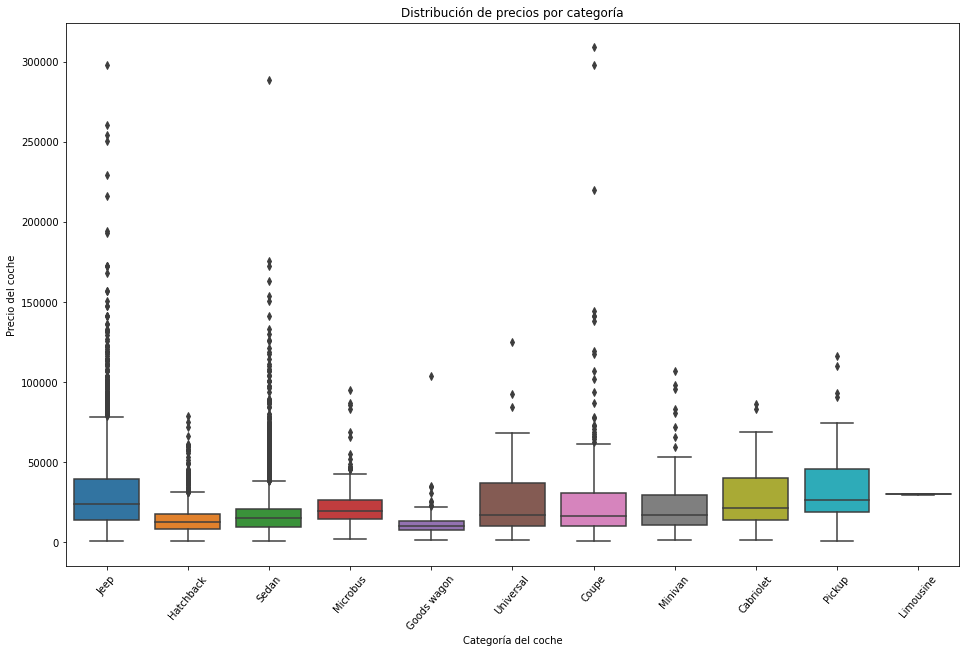

In [126]:
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.boxplot(
    x       = 'Category',
    y       = 'Price',
    data    = df,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución de precios por categoría')
ax.set_ylabel('Precio del coche')
ax.set_xlabel('Categoría del coche')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50);

Cuero interior

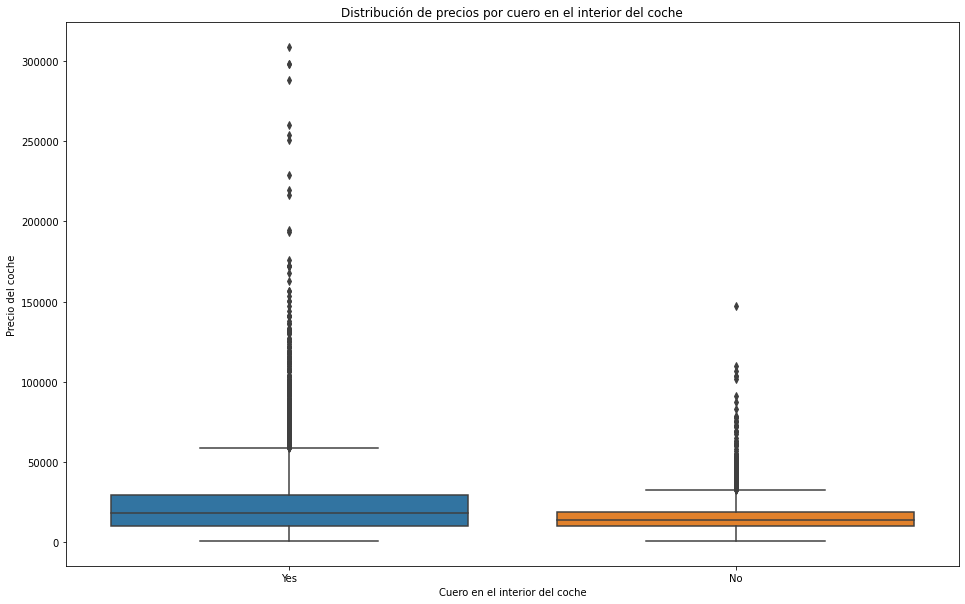

In [127]:
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.boxplot(
    x       = 'Leather interior',
    y       = 'Price',
    data    = df,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución de precios por cuero en el interior del coche')
ax.set_ylabel('Precio del coche')
ax.set_xlabel('Cuero en el interior del coche');

Tipo de carburante

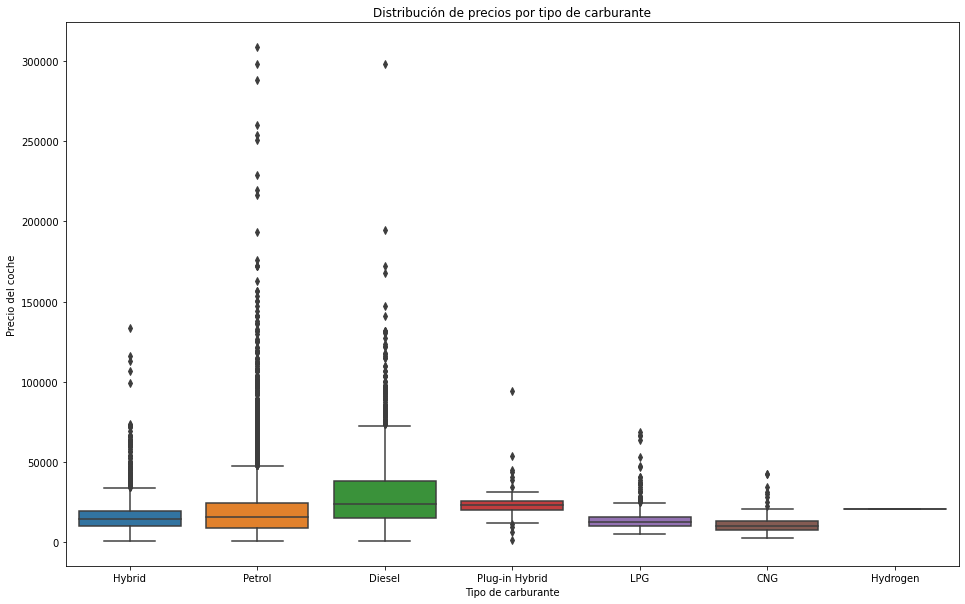

In [128]:
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.boxplot(
    x       = 'Fuel type',
    y       = 'Price',
    data    = df,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución de precios por tipo de carburante')
ax.set_ylabel('Precio del coche')
ax.set_xlabel('Tipo de carburante');

Cilindrada

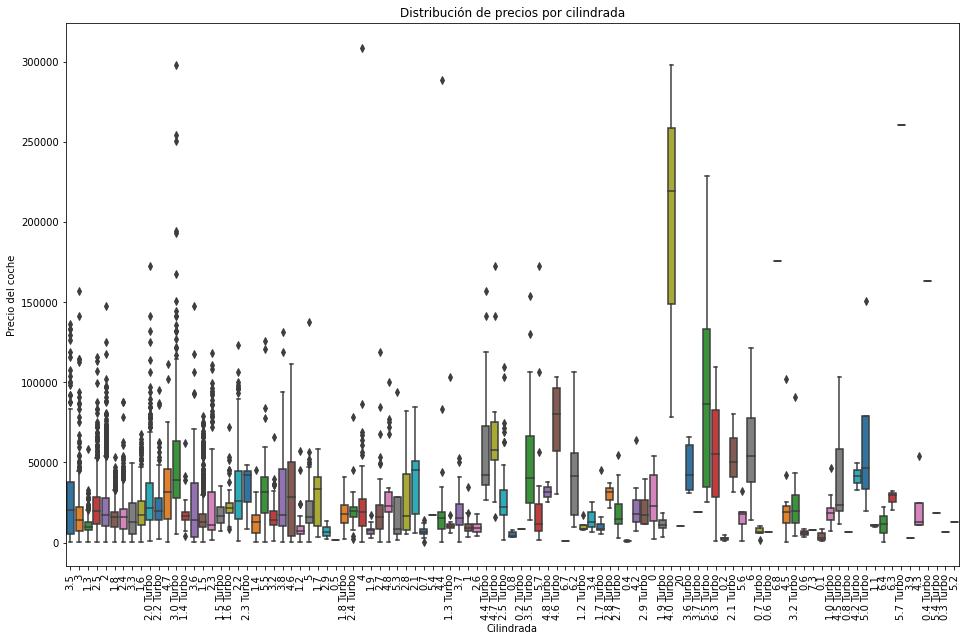

In [129]:
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.boxplot(
    x       = 'Engine volume',
    y       = 'Price',
    data    = df,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución de precios por cilindrada')
ax.set_ylabel('Precio del coche')
ax.set_xlabel('Cilindrada')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

Caja de cambios

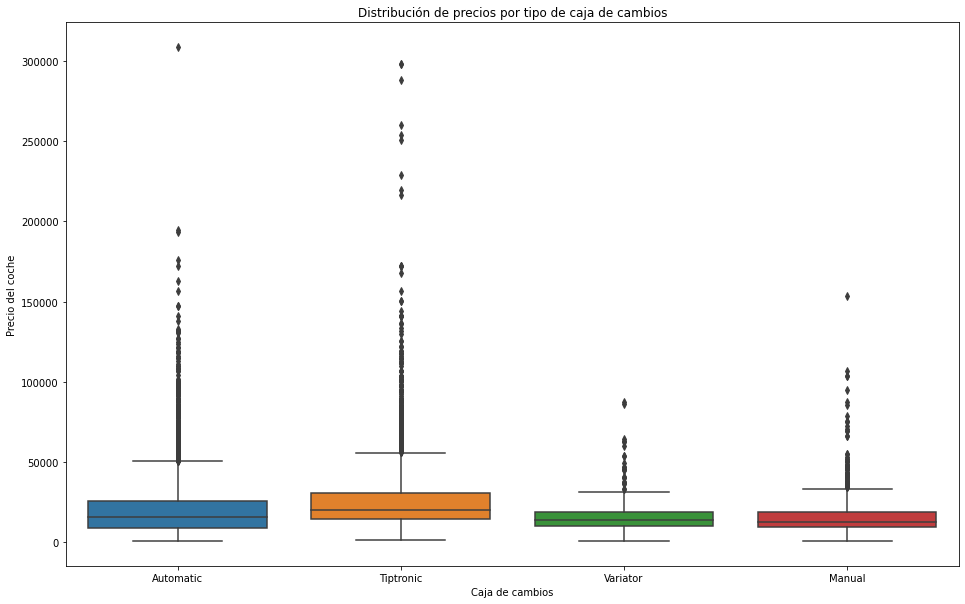

In [130]:
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.boxplot(
    x       = 'Gear box type',
    y       = 'Price',
    data    = df,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución de precios por tipo de caja de cambios')
ax.set_ylabel('Precio del coche')
ax.set_xlabel('Caja de cambios');

Tracción de las ruedas:

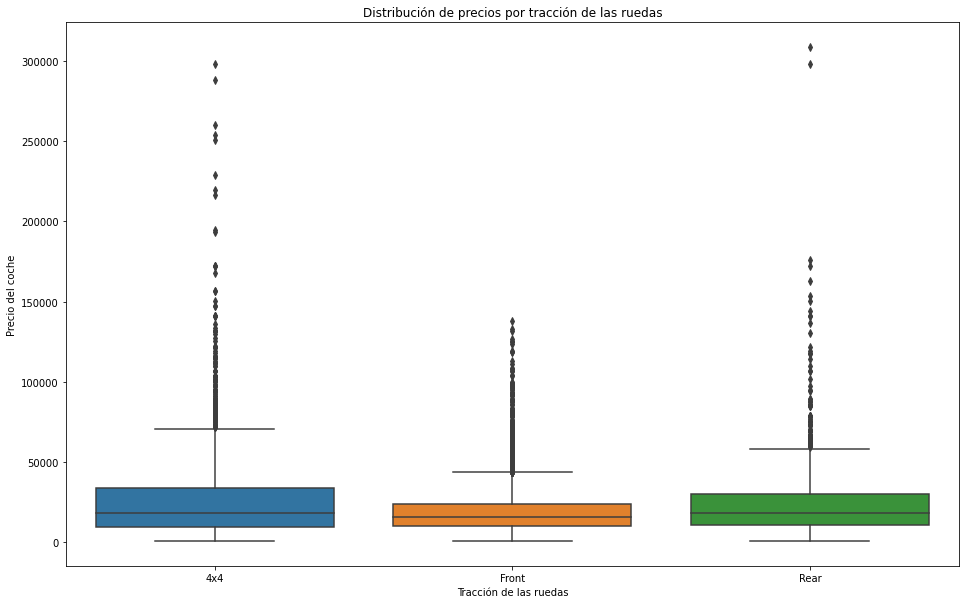

In [131]:
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.boxplot(
    x       = 'Drive wheels',
    y       = 'Price',
    data    = df,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución de precios por tracción de las ruedas')
ax.set_ylabel('Precio del coche')
ax.set_xlabel('Tracción de las ruedas');

Número de puertas:

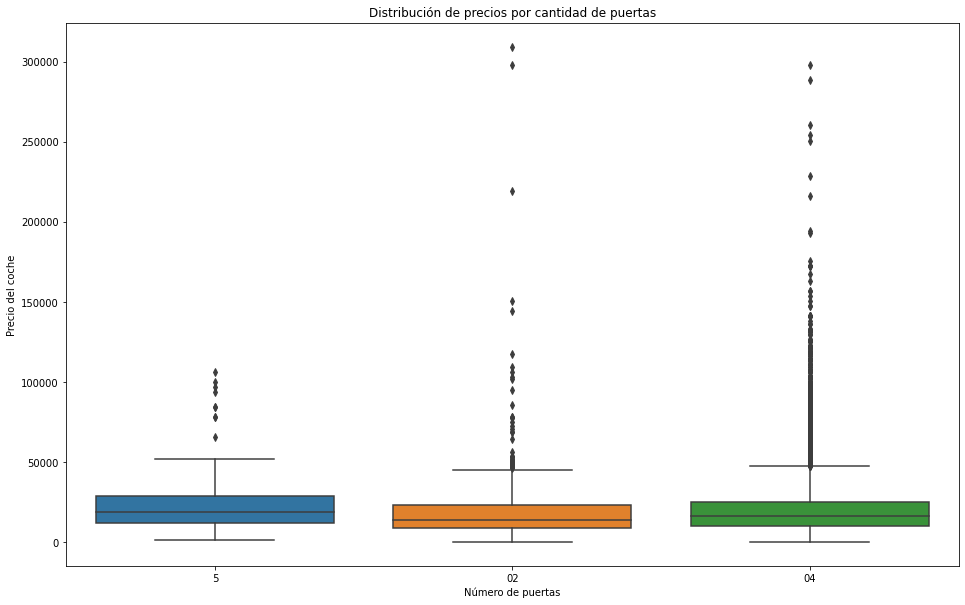

In [132]:
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.boxplot(
    x       = 'Doors',
    y       = 'Price',
    data    = df,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución de precios por cantidad de puertas')
ax.set_ylabel('Precio del coche')
ax.set_xlabel('Número de puertas');

Color:

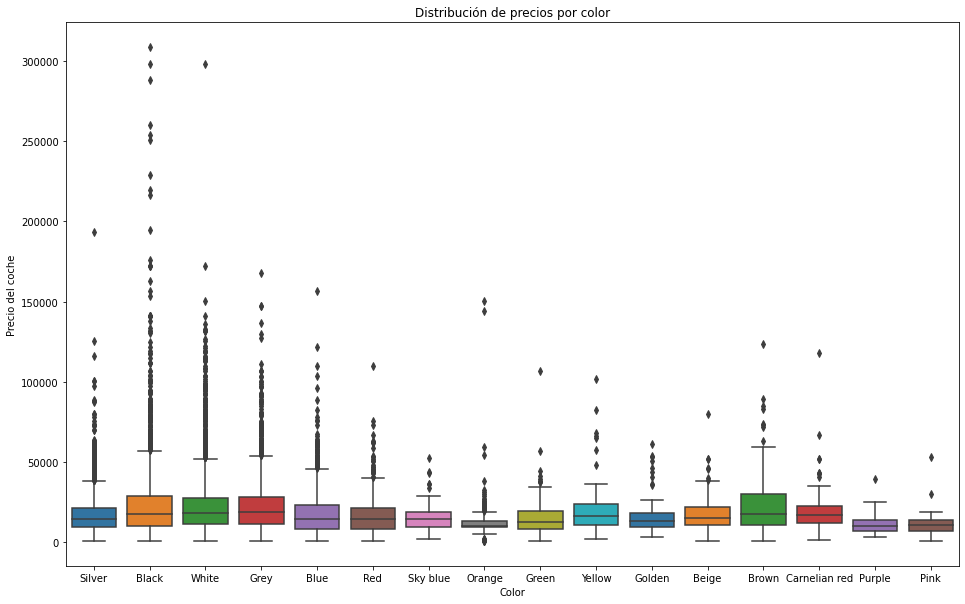

In [133]:
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.boxplot(
    x       = 'Color',
    y       = 'Price',
    data    = df,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución de precios por color')
ax.set_ylabel('Precio del coche')
ax.set_xlabel('Color');

In [134]:
#cambiamos airbags a category???

In [135]:
df["Airbags"].unique()

array([12,  8,  2,  0,  4, 10,  6,  3,  1, 16,  7,  9,  5, 11, 14, 15, 13],
      dtype=int64)

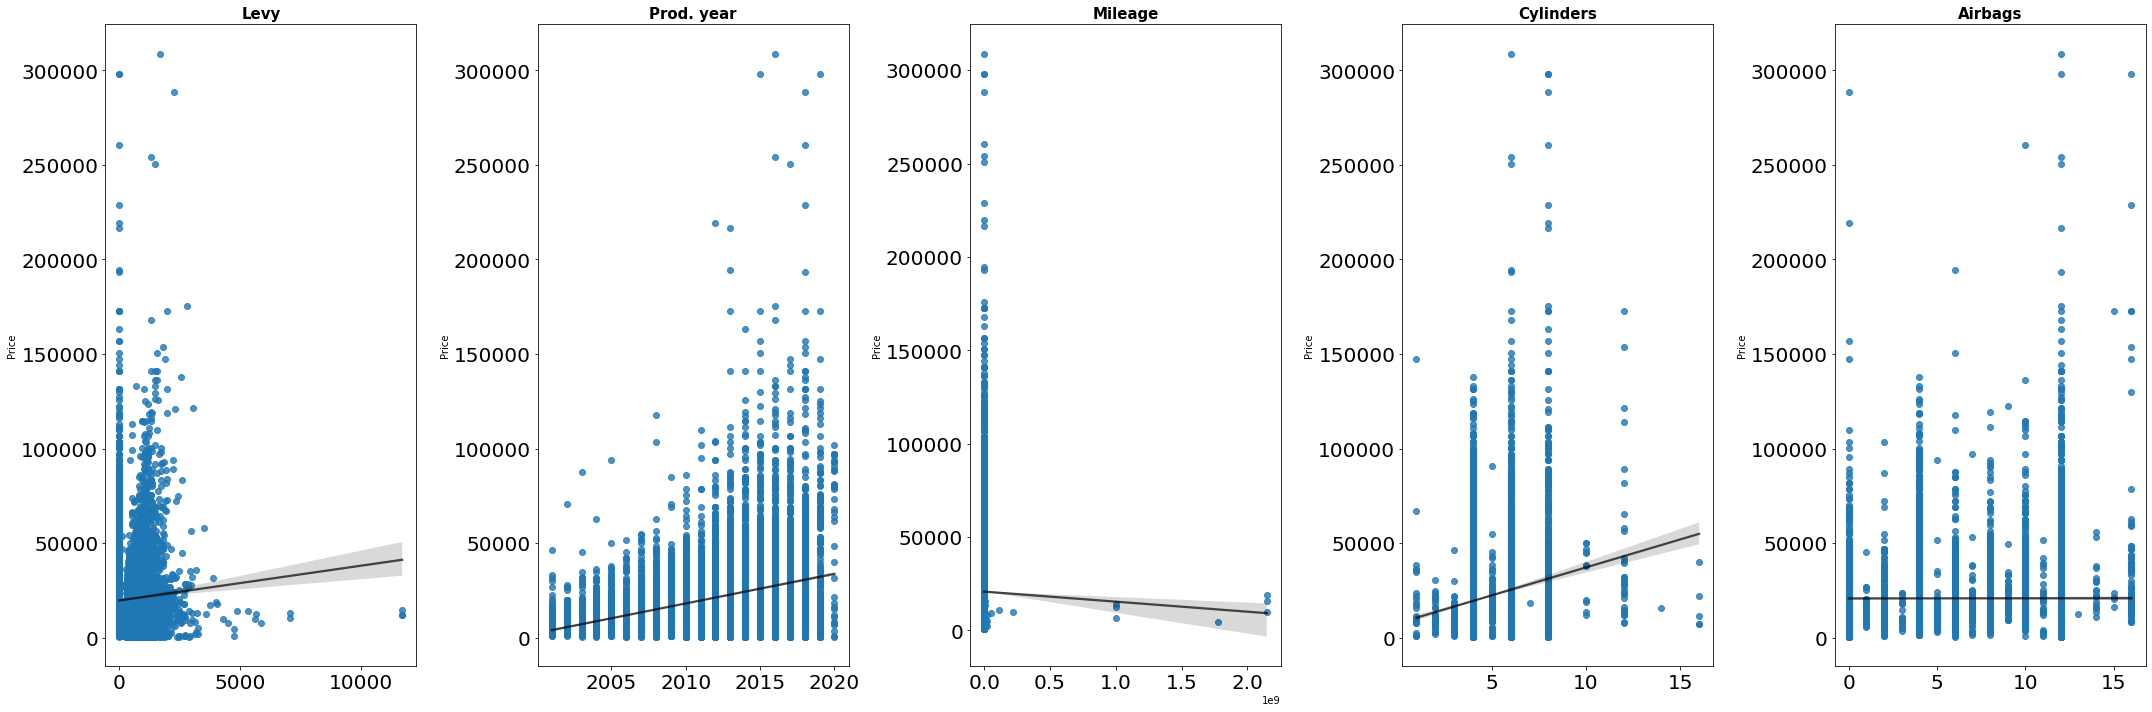

In [136]:
# iniciamos los subplots
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (30, 10))

# definimos una lista de colores. Cada color corresponderá a una gráfica
lista_colores = ["blue", "green", "red", "cyan", "magenta"]

# hemos creado una gráfica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el método .flat. Lo que hace es aplanar los ejes para que queden en una única dimensión
## y luego los vamos rellenando. 
axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop('Price', axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'Price',
        #color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

Basándonos en esta imagen, no podríamos decir, que ninguna variable sea homocedastica.

- Independencia de las variables

In [137]:
crosstab, test_results, expected = rp.crosstab(df["Manufacturer"], df["Doors"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [138]:
crosstab.head()

Doors                  
Doors            5    02    04   All
Manufacturer                        
ACURA         0.00  0.00  0.08  0.08
ALFA ROMEO    0.00  0.01  0.02  0.03
ASTON MARTIN  0.00  0.01  0.00  0.01
AUDI          0.02  0.06  1.17  1.25
BENTLEY       0.00  0.01  0.01  0.01

No hay independencia, variables dependientes, menos en audi y all, revisar

In [139]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 114.0) =,1547.9840
1,p-value =,0.0000
2,Cramer's V =,0.2387


En nuestro caso, el p-valor es menor que 0.05, por lo tanto, nuestras variables son dependientes entre ellas. El fabricante y el número de puertas no muestra una diferencia en el valor de los coches. 

In [140]:
crosstab, test_results, expected = rp.crosstab(df["Category"], df["Leather interior"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [141]:
crosstab.head()

Leather interior              
Leather interior               No    Yes    All
Category                                       
Cabriolet                    0.04   0.17   0.21
Coupe                        0.57   2.30   2.87
Goods wagon                  1.09   0.05   1.14
Hatchback                    9.22   7.02  16.25
Jeep                         4.10  23.79  27.89

In [142]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 10.0) =,1934.2504
1,p-value =,0.0000
2,Cramer's V =,0.3773


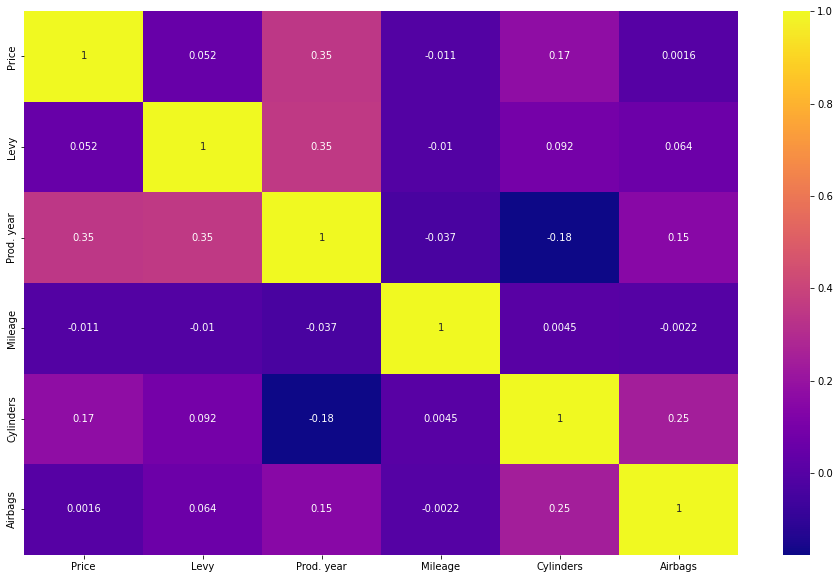

In [143]:
plt.figure()
sns.heatmap(df.corr(), annot=True, cmap = 'plasma')
plt.show()

In [144]:
# Creamos un dataframe todo de unos de la misma forma que nuestra matriz de correlación
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
mask

array([[ True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True]])

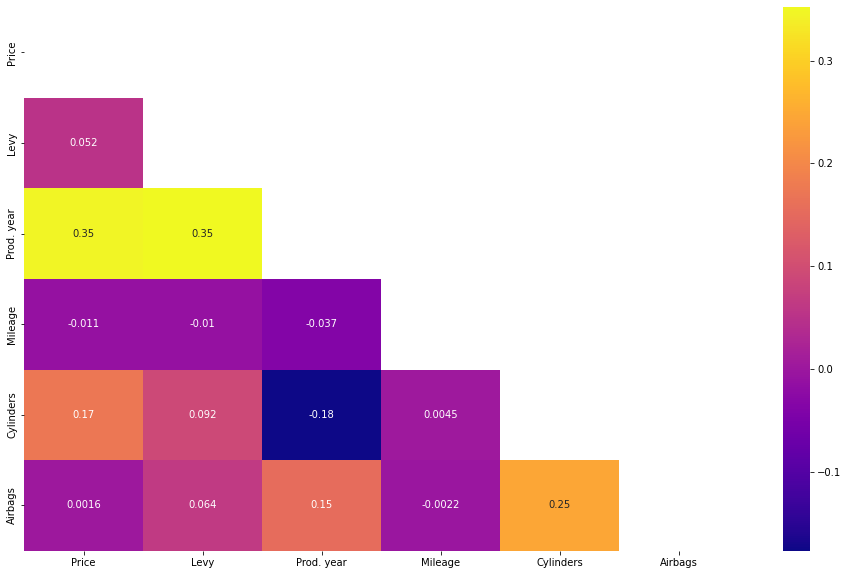

In [145]:
sns.heatmap(df.corr(),
            cmap = "plasma", 
            mask = mask, # incorporamos la máscara en nuestro plot
            annot = True); 

Cada asunción la deberéis testar de forma visual y analítica.

Guardamos el dataset nuevamente porque hemos hecho modificaciones. En pickle para que nos conserve el tipo de datos.

In [146]:
df.to_pickle('datos/cars_price2.pkl')

In [147]:
df.to_csv('datos/cars_price2.csv')